importar librerias a utilizar y la data

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#cargamos los datos del proyecto
data = np.load('proyecto_training_data.npy')
print('filas: ',data.shape[0])
print('columnas: ',data.shape[1])
n = len(data)
print(n)

filas:  1460
columnas:  6
1460


### Análisis exploratorio de datos.
Para cada variable en el dataset calcular((usando numpy):
* media
* valor máximo
* valor mínimo 
* rango(peak to peak, no el rango del tensor que por ser vector sabemos que es 1)
* desviación estándar 
* Para cada variable en el dataset usar seaborn(función distplot https://seaborn.pydata.org/generated/seaborn.distplot.html)  para graficar  un histograma de la variable.


In [3]:
#idenficando columnas del data set
sale_price = data[:,[0]] #precio de la casa en dolares
overall_qual = data[:,[1]] #califica el material y acabado de la casa del 1 al 10
square_feet = data[:,[2]] #pies cuadrados del primer piso
total_room = data[:,[3]] #total de habitaciones
year_build = data[:,[4]] #año en que se construyo
lot_frontage = data[:,[5]] #pies lineales de calle conectados a la propiedad
 
inds = np.where(np.isnan(lot_frontage)) 
lot_frontage[inds] = np.take(np.nanmean(lot_frontage), inds[1])

In [4]:
#Dividir los datos de las variables en 80% datos de entrenamiento y 20% datos de prueba,
#la variable dependiente Y y las dos variables independientes x con mas potencial predictivo

y_train = sale_price[0 : int(n * .80)]/1000
y_test = sale_price[len(y_train): n]/1000

x1_train = overall_qual[0 : int(n * .80)]
x1_test = overall_qual[len(x1_train): n]

x2_train = square_feet[0 : int(n * .80)]/1000
x2_test =  square_feet[len(x2_train): n]/1000

media:  180921.19589041095
valor maximo:  755000.0
valor minimo:  34900.0
rango peak to peak:  [720100.]
desviación estandar:  79415.29188606751


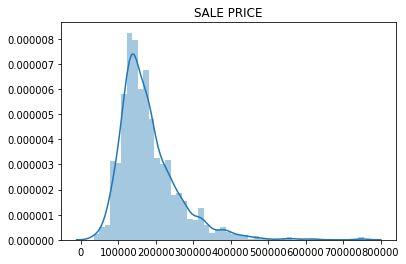

In [5]:
#calcular datos solicitudados. sale_price, todo con numpy
mu_sp = np.mean(sale_price) #media del precio de las casas
vmax_sp = np.max(sale_price) #valor maximo de precio de casas
vmin_sp = np.min(sale_price) #valor minimo de precio de casas
r_sp = np.ptp(sale_price, axis=0) #calcular rango peak to peak
ds_sp = np.std(sale_price) #calcular desviacion estandar de precio de casas

print('media: ',mu_sp)
print('valor maximo: ',vmax_sp)
print('valor minimo: ',vmin_sp)
print('rango peak to peak: ',r_sp)
print('desviación estandar: ',ds_sp)

dist_sp= sns.distplot(sale_price).set_title("SALE PRICE")

OVER ALL QUAL
media:  6.0993150684931505
valor maximo:  10.0
valor minimo:  1.0
rango peak to peak:  [9.]
desviación estandar:  1.3825228366585953


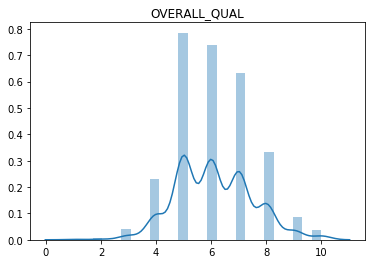

In [6]:
#calcular datos solicitudados. calificacion de acabados y materiales
print('OVER ALL QUAL')
mu_oq = np.mean(overall_qual) #media del calificacion de acabado y materiales
vmax_oq = np.max(overall_qual) #valor maximo de calificacion de acabado y materiales
vmin_oq = np.min(overall_qual) #valor minimo de calificacion de acabado y materiales
r_oq = np.ptp(overall_qual, axis=0) #calcular rango peak to peak
ds_oq = np.std(overall_qual) #calcular desviacion estandar de calificacion de acabado y materiales

print('media: ',mu_oq)
print('valor maximo: ',vmax_oq)
print('valor minimo: ',vmin_oq)
print('rango peak to peak: ',r_oq)
print('desviación estandar: ',ds_oq)

dist_sp= sns.distplot(overall_qual).set_title("OVERALL_QUAL")

SQUARE FEET
media:  1162.626712328767
valor maximo:  4692.0
valor minimo:  334.0
rango peak to peak:  [4358.]
desviación estandar:  386.45532230228963


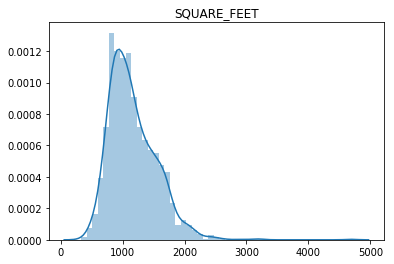

In [7]:
#calcular datos solicitudados. pies cuadrados
print('SQUARE FEET')
mu_sf = np.mean(square_feet) #media
vmax_sf = np.max(square_feet) #valor maximo
vmin_sf = np.min(square_feet) #valor minimo
r_sf = np.ptp(square_feet, axis=0) #calcular rango peak to peak
ds_sf = np.std(square_feet) #calcular desviacion estandar

print('media: ',mu_sf)
print('valor maximo: ',vmax_sf)
print('valor minimo: ',vmin_sf)
print('rango peak to peak: ',r_sf)
print('desviación estandar: ',ds_sf)

dist_sp= sns.distplot(square_feet).set_title("SQUARE_FEET")

TOTAL ROOM
media:  6.517808219178082
valor maximo:  14.0
valor minimo:  2.0
rango peak to peak:  [12.]
desviación estandar:  1.624836553698191


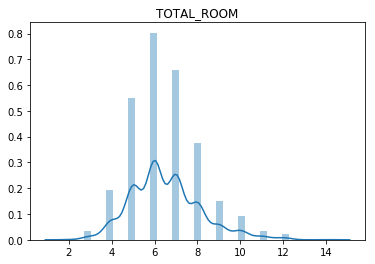

In [8]:
#calcular datos solicitudados. total de habitaciones
print('TOTAL ROOM')
mu_tr = np.mean(total_room) #media
vmax_tr = np.max(total_room) #valor maximo
vmin_tr = np.min(total_room) #valor minimo
r_tr = np.ptp(total_room, axis=0) #calcular rango peak to peak
ds_tr = np.std(total_room) #calcular desviacion estandar

print('media: ',mu_tr)
print('valor maximo: ',vmax_tr)
print('valor minimo: ',vmin_tr)
print('rango peak to peak: ',r_tr)
print('desviación estandar: ',ds_tr)

dist_sp= sns.distplot(total_room).set_title("TOTAL_ROOM")

YEAR BUILD
media:  1971.267808219178
valor maximo:  2010.0
valor minimo:  1872.0
rango peak to peak:  [138.]
desviación estandar:  30.192558810489448


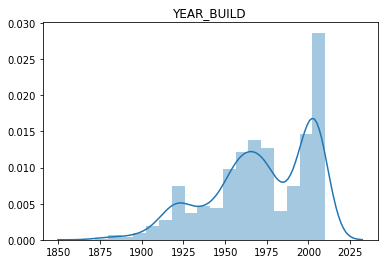

In [9]:
#calcular datos solicitudados. año de construccion
print('YEAR BUILD')
mu_yr = np.mean(year_build) #media
vmax_yr = np.max(year_build) #valor maximo
vmin_yr = np.min(year_build) #valor minimo
r_yr = np.ptp(year_build, axis=0) #calcular rango peak to peak
ds_yr = np.std(year_build) #calcular desviacion estandar

print('media: ',mu_yr)
print('valor maximo: ',vmax_yr)
print('valor minimo: ',vmin_yr)
print('rango peak to peak: ',r_yr)
print('desviación estandar: ',ds_yr)

dist_sp= sns.distplot(year_build).set_title("YEAR_BUILD")

LOT FRONTAGE
media:  70.04995836802664
valor maximo:  313.0
valor minimo:  21.0
rango peak to peak:  292.0
desviación estandar:  22.0164789232215


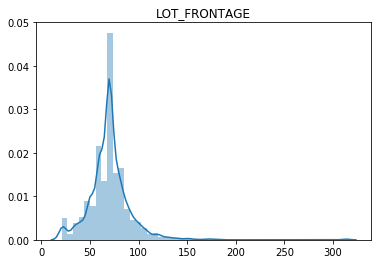

In [10]:
#calcular datos solicitudados. pies lineales al frente
print('LOT FRONTAGE')
mu_lf = np.nanmean(lot_frontage) #media
vmax_lf = np.nanmax(lot_frontage) #valor maximo
vmin_lf = np.nanmin(lot_frontage) #valor minimo
r_lf = np.ptp(lot_frontage) #calcular rango peak to peak
ds_lf = np.nanstd(lot_frontage) #calcular desviacion estandar

print('media: ',mu_lf)
print('valor maximo: ',vmax_lf)
print('valor minimo: ',vmin_lf)
print('rango peak to peak: ',r_lf)
print('desviación estandar: ',ds_lf)

dist_sp= sns.distplot(lot_frontage).set_title("LOT_FRONTAGE")

Graficar x vs y, encontrar coeficiete de corelacion entre las distintas variables independientes.
* Calcular el coeficiente de correlación entre x y y
* graficar x vs y(scatterplot) usando matplotlib
* Colocar el coeficiente de correlación y colocarlo  como parte del título de la gráfica.

Para el proyecto la variable dependiente Y seria el precio de las casas sale_price.
* variables independientes.
* overall_qual
* square_feet
* total_room
* year_build
* lot_frontage


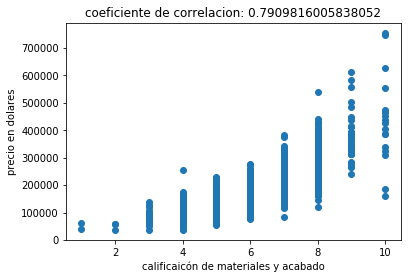

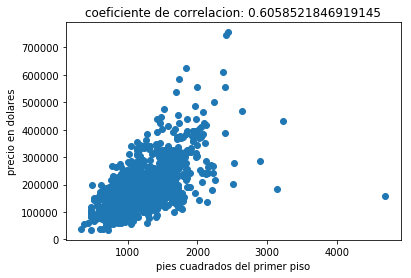

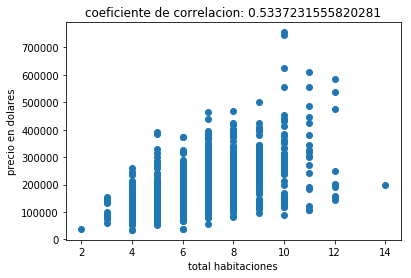

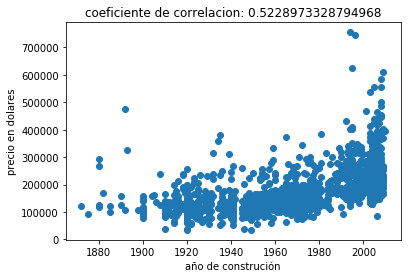

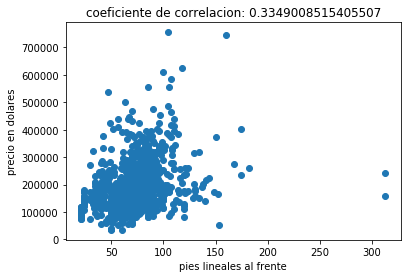

In [11]:
y = sale_price #variable dependiente
#definimos las variables independientes
x1 = overall_qual
x2 = square_feet
x3 = total_room
x4 = year_build
x5 = lot_frontage

coef_x1 = np.corrcoef(x1,y,rowvar=0)
coef_x2 = np.corrcoef(x2,y,rowvar=0)
coef_x3 = np.corrcoef(x3,y,rowvar=0)
coef_x4 = np.corrcoef(x4,y,rowvar=0)
coef_x5 = np.corrcoef(x5,y,rowvar=0)

plt.scatter(x1,y)
plt.xlabel('calificaicón de materiales y acabado')
plt.ylabel('precio en dolares')
plt.title('coeficiente de correlacion: '+ str(coef_x1[0][1]))
plt.show()

plt.scatter(x2,y)
plt.xlabel('pies cuadrados del primer piso')
plt.ylabel('precio en dolares')
plt.title('coeficiente de correlacion: '+ str(coef_x2[0][1]))
plt.show()

plt.scatter(x3,y)
plt.xlabel('total habitaciones')
plt.ylabel('precio en dolares')
plt.title('coeficiente de correlacion: '+ str(coef_x3[0][1]))
plt.show()

plt.scatter(x4,y)
plt.xlabel('año de construción')
plt.ylabel('precio en dolares')
plt.title('coeficiente de correlacion: '+ str(coef_x4[0][1]))
plt.show()

plt.scatter(x5,y)
plt.xlabel('pies lineales al frente')
plt.ylabel('precio en dolares')
plt.title('coeficiente de correlacion: '+ str(coef_x5[0][1]))
plt.show()


Concluimos que las variables independientes con mas potencial predictivo son:
* overall_qual : 0.791
* square_fee : 0.606

In [12]:
#funcion que evalua el modelo
def calcular_modelo(m,x,b):
    return m*x+b

In [13]:
#funcion para calcular el error
#Calcula el error cuadrático medio entre el dato original (y) y el dato generado por el modelo (y_hat) */
def calcular_error(y,y_hat):
    N = y.shape[0]
    error = np.sum((y-y_hat)**2)/N
    return error

In [14]:
#funcion para calcular la gradiente
#Algoritmo del gradiente descendente para minimizar el error cuadrático medio

def gradiente_descendente(m_, b_, lr, x, y):
    N = x.shape[0]      # Cantidad de datos

    # Gradientes: derivadas de la función de error con respecto
    # a los parámetros "m" y "b"
    dm = -(2/N)*np.sum(x*(y-(m_*x+b_)))
    db = -(2/N)*np.sum(y-(m_*x+b_))

    # Actualizar los pesos usando la fórmula del gradiente descendente
    m = m_ - lr*dm
    b = b_ - lr*db

    return m, b

Entrenamiento del modelo con la primera variable independiente overall_qual

In [15]:
#funcion para entrenar el modelo

def entrenamiento(x,y,epochs,imprimir_error,lr,m,b):
    error = np.zeros((epochs,1))
    historial = []
    for i in range(epochs):
        # Actualizar valor de los pesos usando el gradiente descendente
        [m, b] = gradiente_descendente(m,b,lr,x,y)

        # Calcular el valor de la predicción
        y_hat = calcular_modelo(m,x,b)

        # Actualizar el valor del error
        error[i] = calcular_error(y,y_hat)
        d = {'epoch':i+1,'m':m,'b':b}
        
        historial.append(d.copy())

        # Imprimir resultados cada 1000 epochs
        if (i+1)%1000 == 0:
            print("Epoch {}".format(i+1))
            print("    m: {:.1f}".format(m), " b: {:.1f}".format(b))
            print("    error: {}".format(error[i]))
            print("=======================================")
    return m,b,error,historial

In [16]:
#entrenar con la primera variable independiente overall_qual
mr = np.random.randn(1)[0]
br = np.random.randn(1)[0]

lr = 0.009
epochs = 15000
imprimir_error_cada = 1000

[m,b,error,historial1] = entrenamiento(x1_train, y_train,epochs,imprimir_error_cada,lr,mr,br)

Epoch 1000
    m: 38.6  b: -52.9
    error: [2385.86080911]
Epoch 2000
    m: 42.5  b: -77.9
    error: [2310.55678147]
Epoch 3000
    m: 44.2  b: -88.6
    error: [2296.87175857]
Epoch 4000
    m: 44.9  b: -93.1
    error: [2294.38477536]
Epoch 5000
    m: 45.2  b: -95.0
    error: [2293.93281518]
Epoch 6000
    m: 45.3  b: -95.9
    error: [2293.85068032]
Epoch 7000
    m: 45.4  b: -96.2
    error: [2293.83575393]
Epoch 8000
    m: 45.4  b: -96.4
    error: [2293.83304136]
Epoch 9000
    m: 45.4  b: -96.4
    error: [2293.8325484]
Epoch 10000
    m: 45.4  b: -96.4
    error: [2293.83245881]
Epoch 11000
    m: 45.4  b: -96.5
    error: [2293.83244253]
Epoch 12000
    m: 45.4  b: -96.5
    error: [2293.83243957]
Epoch 13000
    m: 45.4  b: -96.5
    error: [2293.83243904]
Epoch 14000
    m: 45.4  b: -96.5
    error: [2293.83243894]
Epoch 15000
    m: 45.4  b: -96.5
    error: [2293.83243892]


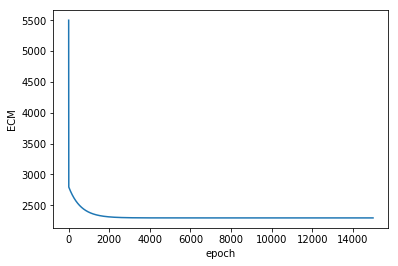

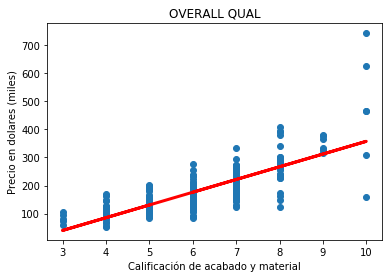

In [17]:
# Gráfica de ECM vs iteraciones y de la regresión lineal resultante
plt.plot(range(epochs),error)
plt.xlabel('epoch')
plt.ylabel('ECM')
plt.show()

y_pred = calcular_modelo(m,x1_test,b)
plt.scatter(x1_test,y_test)
plt.plot(x1_test, y_pred, color="red",linewidth=3)
plt.title("OVERALL QUAL")
plt.xlabel("Calificación de acabado y material")
plt.ylabel("Precio en dolares (miles)")
plt.show()

In [18]:
mr = np.random.randn(1)[0]
br = np.random.randn(1)[0]

lr = 0.002
epochs = 54000
imprimir_error_cada = 1000

[m2,b2,error2,historial2] = entrenamiento(x2_train, y_train,epochs,imprimir_error_cada,lr,mr,br)

Epoch 1000
    m: 99.6  b: 67.6
    error: [3982.7607804]
Epoch 2000
    m: 105.8  b: 59.9
    error: [3933.39181454]
Epoch 3000
    m: 110.8  b: 53.8
    error: [3902.27937015]
Epoch 4000
    m: 114.8  b: 49.0
    error: [3882.67218111]
Epoch 5000
    m: 117.9  b: 45.1
    error: [3870.31565079]
Epoch 6000
    m: 120.4  b: 42.1
    error: [3862.52851512]
Epoch 7000
    m: 122.3  b: 39.7
    error: [3857.62103053]
Epoch 8000
    m: 123.9  b: 37.7
    error: [3854.52831377]
Epoch 9000
    m: 125.2  b: 36.2
    error: [3852.57927109]
Epoch 10000
    m: 126.1  b: 35.0
    error: [3851.35097646]
Epoch 11000
    m: 126.9  b: 34.0
    error: [3850.57690019]
Epoch 12000
    m: 127.6  b: 33.3
    error: [3850.08907417]
Epoch 13000
    m: 128.0  b: 32.7
    error: [3849.78164423]
Epoch 14000
    m: 128.4  b: 32.2
    error: [3849.58790063]
Epoch 15000
    m: 128.8  b: 31.8
    error: [3849.46580263]
Epoch 16000
    m: 129.0  b: 31.5
    error: [3849.38885597]
Epoch 17000
    m: 129.2  b: 31.3
 

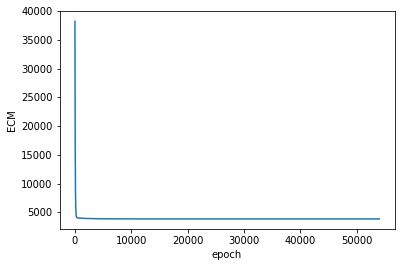

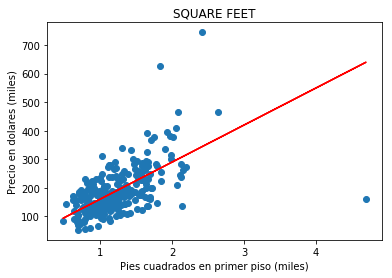

In [19]:
# Gráfica de ECM vs iteraciones y de la regresión lineal resultante
plt.plot(range(epochs),error2)
plt.xlabel('epoch')
plt.ylabel('ECM')
plt.show()

y_pred2 = calcular_modelo(m2,x2_test,b2)
plt.scatter(x2_test,y_test)
plt.plot(x2_test,y_pred2,'r')
plt.title("SQUARE FEET")
plt.xlabel("Pies cuadrados en primer piso (miles)")
plt.ylabel("Precio en dolares (miles)")
plt.show()

Prediccion utilizando scistick-learn para variables independientes 
* x1 = calificacion de acabado y material
* x2 = pies cuadrados del por piso


La ecuación del modelo es igual a:
 y= 45.41199877915908 x + -96.46957131873936
presicion del modelo:  0.6304202002336673


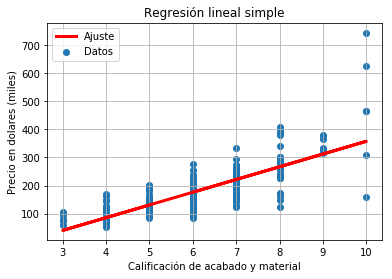

In [20]:
lr = linear_model.LinearRegression()

lr.fit(x1_train,y_train)
Ypred = lr.predict(x1_test)
print("\nLa ecuación del modelo es igual a:")
print(" y=",lr.coef_[0][0],'x +',lr.intercept_[0])
print('presicion del modelo: ', lr.score(x1_train,y_train))
ms = lr.coef_[0][0];
bs = lr.intercept_[0];

plt.scatter(x1_test,y_test,label="Datos")
plt.plot(x1_test,Ypred,color="red",linewidth=3,label="Ajuste")
plt.title("Regresión lineal simple")
plt.xlabel("Calificación de acabado y material")
plt.ylabel("Precio en dolares (miles)")
plt.grid()
plt.legend()
plt.show()


La ecuación del modelo es igual a:
 y= 108.58037880582866 x + 53.26885682046969
presicion del modelo:  0.3690365742639544


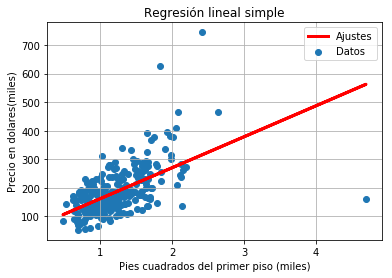

In [21]:
lr2 = linear_model.LinearRegression()

lr2.fit(x2_test,y_test)
Y2pred = lr2.predict(x2_test)


print("\nLa ecuación del modelo es igual a:")
print(" y=",lr2.coef_[0][0],'x +',lr2.intercept_[0])
print('presicion del modelo: ', lr2.score(x2_train,y_train))

m2s = lr2.coef_[0][0];
b2s = lr2.intercept_[0];

plt.scatter(x2_test,y_test,label="Datos")
plt.plot(x2_test,Y2pred,color="red",linewidth=3,label="Ajustes")
plt.title("Regresión lineal simple")
plt.xlabel("Pies cuadrados del primer piso (miles)")
plt.ylabel("Precio en dolares(miles)")
plt.grid()
plt.legend()
plt.show()

In [22]:
#modelos creados manualmente
print("modelos entrenados manualmente, precio en miles")

modelo_x1_m = {'m' : m, 'b' : b}
print("\npara variable overall_qual")
print(" y=",m,'x +' + str(b))

modelo_x2_m = {'m' : m2, 'b' : b2}
print("\npara variable square_feet")
print(" y=",m2,'x +' + str(b2))

#modelos creados manualmente
print("\nmodelos entrenados con scikit-lear, precio en miles")

modelo_x1_ms = {'m' : ms, 'b' : bs}
print("\npara variable overall_qual")
print(" y=",ms,'x +' + str(bs))

modelo_x2_ms = {'m' : m2s, 'b' : b2s}
print("\npara variable square_feet")
print(" y=",m2s,'x +' + str(b2s))


modelos entrenados manualmente, precio en miles

para variable overall_qual
 y= 45.411954254053065 x +-96.46928616874928

para variable square_feet
 y= 129.95109474953566 x +30.324766224053647

modelos entrenados con scikit-lear, precio en miles

para variable overall_qual
 y= 45.41199877915908 x +-96.46957131873936

para variable square_feet
 y= 108.58037880582866 x +53.26885682046969


In [23]:
#definir funciones para modelos variables independientes
def promedio_modelos(modm, mods,promedio,variable):
    pred_m = calcular_modelo(modm['m'],variable, modm['b'])
    pred_s = calcular_modelo(mods['m'], variable, mods['b'])
    prom_m_s = (pred_m + pred_s) / 2;
    
    return pred_m, pred_s, prom_m_s    

In [24]:
#calculando predicciones estimadas
# modelo manual, modelo con scitik-lear, vector de tamaño x, variable
promedio = np.zeros(len(y_test))
m1manual,m1sci,prom1 = promedio_modelos(modelo_x1_m, modelo_x1_ms,promedio,x1_test)
m2manual,m2sci,prom2 = promedio_modelos(modelo_x2_m, modelo_x2_ms,promedio,x2_test)
modelox1 = np.hstack((x1_test, y_test * 1000,m1manual,m1sci,prom1))
modelox2 = np.hstack((x2_test*1000,y_test * 1000,m2manual * 1000,m2sci * 1000,prom2*1000))

df1 = pd.DataFrame(data=modelox1,
                   columns=["calificación", "Precio real","Predicción manual", "Predicción sci", "promedio"])
df2 = pd.DataFrame(data=modelox2,
                   columns=["pies cuadrados", "Precio real","Predicción manual", "Predicción sci", "promedio"])

In [25]:
#visualizar los primeros y ultimos registros con pandas
print("tabla de predicciones para la variable independiente overall_qual")
df1.head()

tabla de predicciones para la variable independiente overall_qual


,calificación,Precio real,Predicción manual,Predicción sci,promedio
0,6.0,235000.0,176.002439,176.002421,176.002430
1,10.0,625000.0,357.650256,357.650416,357.650336
2,6.0,171000.0,176.002439,176.002421,176.002430
3,6.0,163000.0,176.002439,176.002421,176.002430
4,7.0,171900.0,221.414394,221.414420,221.414407


In [26]:
#visualizar variable independiente square_feet
print("tabla de predicciones para la variable independiente overall_qual")
df2.head(10)

tabla de predicciones para la variable independiente overall_qual


,pies cuadrados,Precio real,Predicción manual,Predicción sci,promedio
0,1236.0,235000.0,190944.319334,187474.205024,189209.262179
1,1831.0,625000.0,268265.220710,252079.530414,260172.375562
2,1118.0,171000.0,175610.090154,174661.720325,175135.905240
3,1261.0,163000.0,194193.096703,190188.714495,192190.905599
4,625.0,171900.0,111544.200443,121131.593574,116337.897008
5,1636.0,200500.0,242924.757234,230906.356547,236915.556891
6,1170.0,239000.0,182367.547081,180307.900023,181337.723552
7,2129.0,285000.0,306990.646946,284436.483298,295713.565122
8,923.0,119500.0,150269.626678,153488.546458,151879.086568
9,818.0,115000.0,136624.761729,142087.606684,139356.184206


In [27]:
#evolucion del modelo con el tiempo
def evolucion_modelo(historial,iteracion,variable, variable_name):
    for i in range(0,len(historial)):
        if(i%iteracion == 0):
            y_pred = calcular_modelo(historial[i]['m'],variable,historial[i]['b'])
            plt.scatter(variable,y_test,label="Datos")
            plt.plot(variable,y_pred,'r',label="Ajustes")
            plt.title('iteracion: '+str(i))
            plt.xlabel(variable_name)
            plt.ylabel("Precio en dolares (miles)")
            plt.grid()
            plt.legend()
            plt.show()

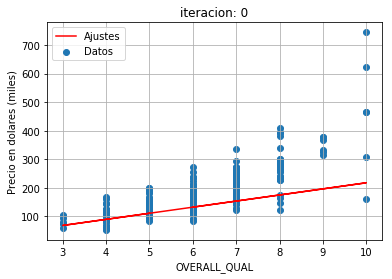

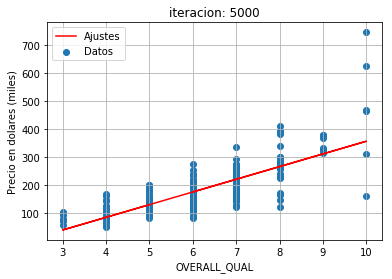

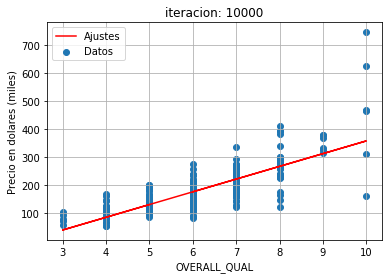

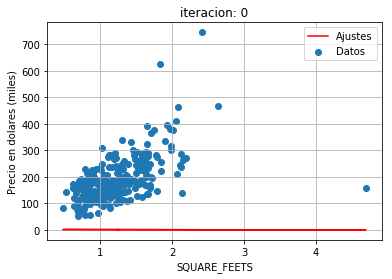

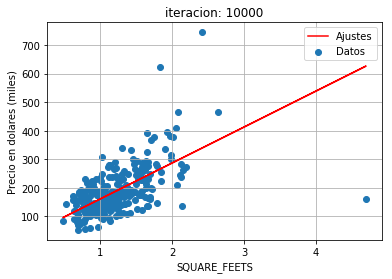

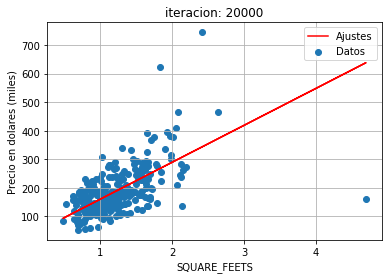

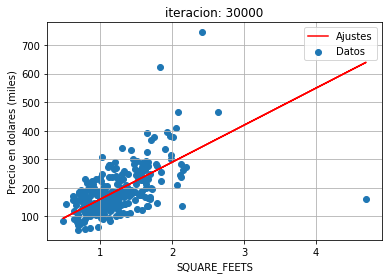

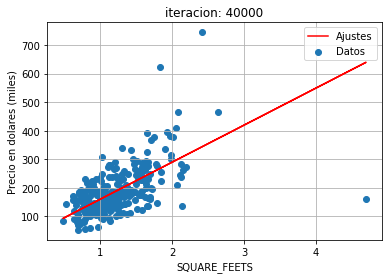

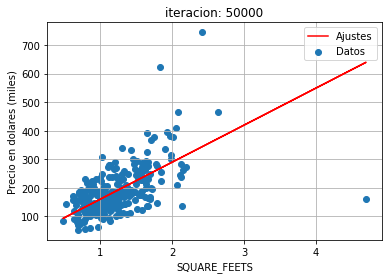

In [28]:
evolucion_modelo(historial1,5000,x1_test,'OVERALL_QUAL')
print("\n===================================================\n")
evolucion_modelo(historial2,10000,x2_test,'SQUARE_FEETS')

In [29]:
def calcular_error_graph(pred_m,pred_s):
    error_m = calcular_error(y_test,pred_m)
    error_s = calcular_error(y_test,pred_s)
    
    return error_m, error_s
    

variable x1 overrall_qual entranamiento manual:  2630.182573723007
variable x1 square_feet scikit-lear:  2630.182608948639
variable x2 overrall_qual entranamiento manual:  4585.537120148237
variable x2 square_feet scikit-lear:  4493.912134451241


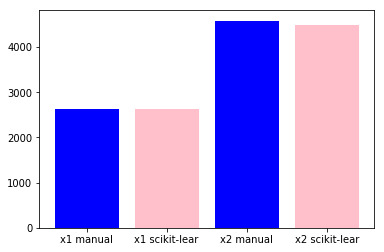

In [30]:
error = calcular_error_graph(m1manual, m1sci)
print('variable x1 overrall_qual entranamiento manual: ',error[0])
print('variable x1 square_feet scikit-lear: ',error[1])

error2 = calcular_error_graph(m2manual, m2sci)
print('variable x2 overrall_qual entranamiento manual: ',error2[0])
print('variable x2 square_feet scikit-lear: ',error2[1])


height = [error[0], error[1], error2[0], error2[1]] #para poder visualizar en la gráfica
bars = ('x1 manual', 'x1 scikit-lear', 'x2 manual', 'x2 scikit-lear')
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color=['blue', 'pink', 'blue','pink'])
plt.xticks(y_pos, bars)
plt.show()

### conclusion

Los modelos entrenados con scikit-lear tienen ligeramente un error mas bajo, que los entrenados manualmente, por lo tanto la predicción sera mas exacta.

Para ambas variables x1 que corresponde a la calificacion de materiales y acabados y x2 que corresponde a los pies cuadrados del primer piso, se usaran los modelos entrenados con scikit-lear.

Ademas la variable independiente x1 obtiene una mayor precision del modelo por lo tanto es mas eficiente que el modelo la variable x2